In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [16]:
diabetic7 = pd.read_csv("./dataset_diabetes/diabetic7.csv")

In [17]:
diabetic7.shape

(84432, 44)

In [18]:
diabetic7 = diabetic7.drop(['admission_type_id'], axis=1)

In [19]:
le = preprocessing.LabelEncoder()

In [20]:
categorical = diabetic7.select_dtypes(include = ["object"]).columns
numerical = diabetic7.select_dtypes(exclude = ["object"]).columns
print("Number of Categorical features: " + str(len(categorical)))
print("Number of Numerical features: " + str(len(numerical)))
diabetic7_categorical = diabetic7[categorical]
diabetic7_numerical = diabetic7[numerical]

Number of Categorical features: 28
Number of Numerical features: 15


In [21]:
categorical= list(categorical)
numerical = list(numerical)

In [22]:
for i in categorical:
    diabetic7[i] = le.fit_transform(diabetic7[i])

In [23]:
answer = diabetic7['target']
diabetic7 = diabetic7.drop(['target'], axis=1)

In [24]:
#divide the dataset into train/test 7:3?
X_train, X_test, y_train, y_test = train_test_split(diabetic7, answer, test_size = 0.3, random_state = 0, stratify=answer, shuffle=True)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (59102, 42)
X_test : (25330, 42)
y_train : (59102,)
y_test : (25330,)


In [83]:
bestparam = {'colsample_bytree': 0.6,
 'gamma': 0.8,
 'max_depth': 5,
 'min_child_weight': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 280,
 'njobs': -1,
 'reg_alpha': 0.4,
 'scale_pos_weight': 9,
 'subsample': 0.9}

In [84]:
# Fit the model
model=XGBClassifier(random_state = 0,**bestparam, class_weight = {0:1, 1:8})
#model.set_params(bestparam)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)
model.score(X_test, y_test)

[0]	validation_0-auc:0.56602
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.619601
[2]	validation_0-auc:0.630656
[3]	validation_0-auc:0.64927
[4]	validation_0-auc:0.655194
[5]	validation_0-auc:0.65673
[6]	validation_0-auc:0.656228
[7]	validation_0-auc:0.659212
[8]	validation_0-auc:0.659519
[9]	validation_0-auc:0.660935
[10]	validation_0-auc:0.66166
[11]	validation_0-auc:0.662206
[12]	validation_0-auc:0.661561
[13]	validation_0-auc:0.662569
[14]	validation_0-auc:0.663019
[15]	validation_0-auc:0.663129
[16]	validation_0-auc:0.663218
[17]	validation_0-auc:0.66317
[18]	validation_0-auc:0.664339
[19]	validation_0-auc:0.664751
[20]	validation_0-auc:0.665161
[21]	validation_0-auc:0.66517
[22]	validation_0-auc:0.665649
[23]	validation_0-auc:0.666129
[24]	validation_0-auc:0.665878
[25]	validation_0-auc:0.666159
[26]	validation_0-auc:0.66663
[27]	validation_0-auc:0.666185
[28]	validation_0-auc:0.666649
[29]	validation_0-auc:0.666271
[30]	validation_0-auc:0

0.5532175286221871

In [33]:
from sklearn.metrics import roc_auc_score, recall_score, precision_score, accuracy_score

In [85]:
AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

In [86]:
AUC

0.6666484952819389

In [38]:
model.predict_proba(X_test) > 0.55

array([[False, False],
       [False, False],
       [False, False],
       ...,
       [False, False],
       [ True, False],
       [ True, False]])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16cde780>]],
      dtype=object)

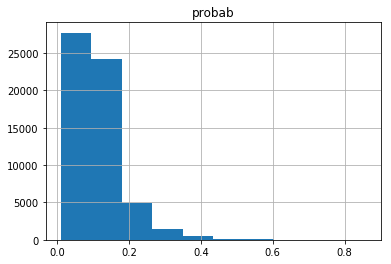

In [63]:
from collections import Counter

pd.DataFrame({"probab":model.predict_proba(X_train)[:,1]}).hist()

In [87]:
print("auc train score: ", roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
print("auc test score: ",roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
print("recall train score: ",recall_score(y_train, model.predict(X_train)))
print("recall test score: ",recall_score(y_test, model.predict(X_test)))
print("precision train score: ", precision_score(y_train, model.predict(X_train)))
print("precision test score: ",precision_score(y_test, model.predict(X_test)))
print("accuracy train score: ",accuracy_score(y_train, model.predict(X_train)))
print("accuracy test score: ",accuracy_score(y_test, model.predict(X_test)))
print(confusion_matrix(y_test, model.predict(X_test)))

auc train score:  0.6958911951068076
auc test score:  0.6666484952819389
recall train score:  0.7285289747399702
recall test score:  0.7039861351819757
precision train score:  0.16911561810154527
precision test score:  0.16255802785336962
accuracy train score:  0.5615038408175697
accuracy test score:  0.5532175286221871
[[11982 10463]
 [  854  2031]]


__review pickled file & original__

In [70]:
import pickle

pickle_path = "./xgboost_bestauc_pickle"

with open(pickle_path, 'rb') as handle:
    mod = pickle.load(handle)

In [82]:
print(model.get_params()["scale_pos_weight"])

1


In [81]:
mod.get_params()["scale_pos_weight"]

9

In [72]:
print("auc train score: ", roc_auc_score(y_train, mod.predict_proba(X_train)[:,1]))
print("auc test score: ",roc_auc_score(y_test, mod.predict_proba(X_test)[:,1]))
print("recall train score: ",recall_score(y_train, mod.predict(X_train)))
print("recall test score: ",recall_score(y_test, mod.predict(X_test)))
print("precision train score: ", precision_score(y_train, mod.predict(X_train)))
print("precision test score: ",precision_score(y_test, mod.predict(X_test)))
print("accuracy train score: ",accuracy_score(y_train, mod.predict(X_train)))
print("accuracy test score: ",accuracy_score(y_test, mod.predict(X_test)))
print(confusion_matrix(y_test, mod.predict(X_test)))

auc train score:  0.6958911951068076
auc test score:  0.6666484952819389
recall train score:  0.7285289747399702
recall test score:  0.7039861351819757
precision train score:  0.16911561810154527
precision test score:  0.16255802785336962
accuracy train score:  0.5615038408175697
accuracy test score:  0.5532175286221871
[[11982 10463]
 [  854  2031]]


In [76]:
for key in mod.get_params():
    if mod.get_params()[key] != model.get_params()[key]:
        print(key)

missing
scale_pos_weight


In [68]:
print(confusion_matrix(y_test, model.predict_proba(X_test)[:,1]>0.2 ))

[[20788  1657]
 [ 2274   611]]


In [37]:
import pickle
with open('xgboost_bestauc_pickle', 'wb') as picklefile:
    pickle.dump(model, picklefile)
loadedmodel = pickle.load(open('xgboost_bestauc_pickle', 'rb'))